In [58]:
import joblib 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
if 'src' in os.getcwd() or 'results' in os.getcwd():
    os.chdir('..')
    print(os.getcwd())
if 'src' not in os.getcwd():
    os.chdir('src')

from experiments_helpers import ExperimentResults

if 'src' in os.getcwd() or 'results' in os.getcwd():
    os.chdir('..')
    print(os.getcwd())

folder = 'results_big_benchmark_march6/results'
DATASET = 'wine_quality'
BASE_METHOD = 'dice'
ROBUST_METHOD = 'statrob'
EXPERIMENT = 'SameSampleExperimentData' #'TwoSamplesOneDatasetExperimentData'
ENSEMBLE = 'mlp-torch'
# name = 'mlp-torch-fico-statrob-TwoSamplesOneDatasetExperimentData-gs-config_a060.yml_0'
name = f'{ENSEMBLE}-{DATASET}-{ROBUST_METHOD}-{EXPERIMENT}-{BASE_METHOD}-config_a090.yml_0'

es_base: ExperimentResults = ExperimentResults.load_results_from_file(f'{folder}/{name}.joblib')

es_base.pretty_print_robust_vs_base()

/home/ignacy/research/robust-cf
ExperimentResults with 32 metrics and 0 artifacts.
############################## Metrics ##############################
------------------------- Base metrics -------------------------
validity: 1.00 (std: 0.00)
proximityL1: 0.74 (std: 0.43)
proximityL2: 0.60 (std: 0.30)
lof: -2.25 (std: 0.91)
cf_counterfactual_stability: 0.14 (std: 0.15)
dpow: 0.56 (std: 0.24)
plausibility: 0.47 (std: 0.24)
generation_time: 1.05 (std: 3.54)
------------------------- Base metrics 2 -------------------------
validity_2: 0.72 (std: 0.45)
proximityL1_2: 0.74 (std: 0.43)
proximityL2_2: 0.60 (std: 0.30)
lof_2: -2.25 (std: 0.91)
cf_counterfactual_stability_2: 0.24 (std: 0.20)
dpow_2: 0.58 (std: 0.23)
plausibility_2: 0.47 (std: 0.24)
------------------------- Robust metrics -------------------------
robust_validity: nan (std: nan)
robust_proximityL1: nan (std: nan)
robust_proximityL2: nan (std: nan)
robust_lof: nan (std: nan)
robust_cf_counterfactual_stability: nan (std: nan)


In [59]:
es_base.get_results_as_pandas()

,validity,proximityL1,proximityL2,lof,cf_counterfactual_stability,dpow,plausibility,validity_2,proximityL1_2,proximityL2_2,...,robust_validity_2,robust_proximityL1_2,robust_proximityL2_2,robust_lof_2,robust_cf_counterfactual_stability_2,robust_dpow_2,robust_plausibility_2,robust_generation_time,robust_cf_to_base_cf_proximity_L1,robust_cf_to_base_cf_proximity_L2
0,1,0.416316,0.416316,-2.011682,0.145813,0.733333,0.374959,1,0.416316,0.416316,...,1.0,0.830865,0.430481,-1.915720,0.374135,0.733333,0.337069,2.236120,0.460513,0.176439
1,1,0.382187,0.382187,-2.054409,-0.000581,0.200000,0.410944,0,0.382187,0.382187,...,1.0,1.008052,0.377704,-1.891780,0.184126,0.333333,0.348116,1.464509,0.830461,0.273473
2,1,0.498104,0.498104,-1.757099,0.306902,0.400000,0.305769,1,0.498104,0.498104,...,1.0,0.515308,0.498812,-1.763532,0.044176,0.400000,0.305934,0.109647,0.017203,0.006315
3,1,1.772629,1.256672,-4.638306,0.001959,0.266667,1.165101,1,1.772629,1.256672,...,1.0,2.802218,1.258211,-5.212246,0.645923,0.600000,1.103381,2.085976,1.305913,0.492354
4,1,1.361414,0.963194,-3.838182,0.505072,0.733333,0.803946,1,1.361414,0.963194,...,1.0,1.361414,0.963194,-3.838182,0.806819,0.733333,0.803946,0.019598,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,1,1.020219,0.733262,-2.057515,0.108371,0.866667,0.404183,1,1.020219,0.733262,...,1.0,1.020219,0.733262,-2.057515,0.387244,0.866667,0.404183,0.614704,0.000000,0.000000
971,1,0.750594,0.585124,-1.736519,0.187259,0.733333,0.259854,1,0.750594,0.585124,...,1.0,0.750594,0.585124,-1.736519,0.302305,0.733333,0.259854,0.565036,0.000000,0.000000
972,1,1.368601,0.976499,-4.386489,0.014298,0.666667,0.936558,1,1.368601,0.976499,...,1.0,2.088628,1.036361,-4.930350,0.319181,0.800000,0.986437,1.921399,0.720027,0.255746
973,1,0.541629,0.541629,-2.535573,-0.027008,0.600000,0.538472,1,0.541629,0.541629,...,1.0,0.972076,0.548057,-2.569749,0.388972,0.733333,0.531789,3.305167,0.474004,0.174917


In [60]:
res = es_base.get_results_as_pandas()
res = res.dropna() #TODO investigate what causes nulls 
res = res[res['robust_validity'] > 0] #TODO fix so robust cf is always valid for model 1
cols = [x for x in res.columns if 'prox' in x]
res[cols].mean()

proximityL1                          0.736401
proximityL2                          0.592967
proximityL1_2                        0.736401
proximityL2_2                        0.592967
robust_proximityL1                   1.047103
robust_proximityL2                   0.610694
robust_proximityL1_2                 1.047103
robust_proximityL2_2                 0.610694
robust_cf_to_base_cf_proximity_L1    0.386236
robust_cf_to_base_cf_proximity_L2    0.142362
dtype: float64

<div style="background-color: #880000; color: #FFFFFF; font-weight: bold; padding: 10px; margin: 10px 0 20px 0; text-align: center; border-radius: 10px;">Empirical validity on the changed model vs the selected alpha threshold </div>

Saving to results_big_benchmark_march6/plots
Starting to plot...
======================================== Experiment type: SameSampleExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/empirical_vs_alpha_gs_SameSampleExperimentData.png
x_minval: 0.26267937074267234


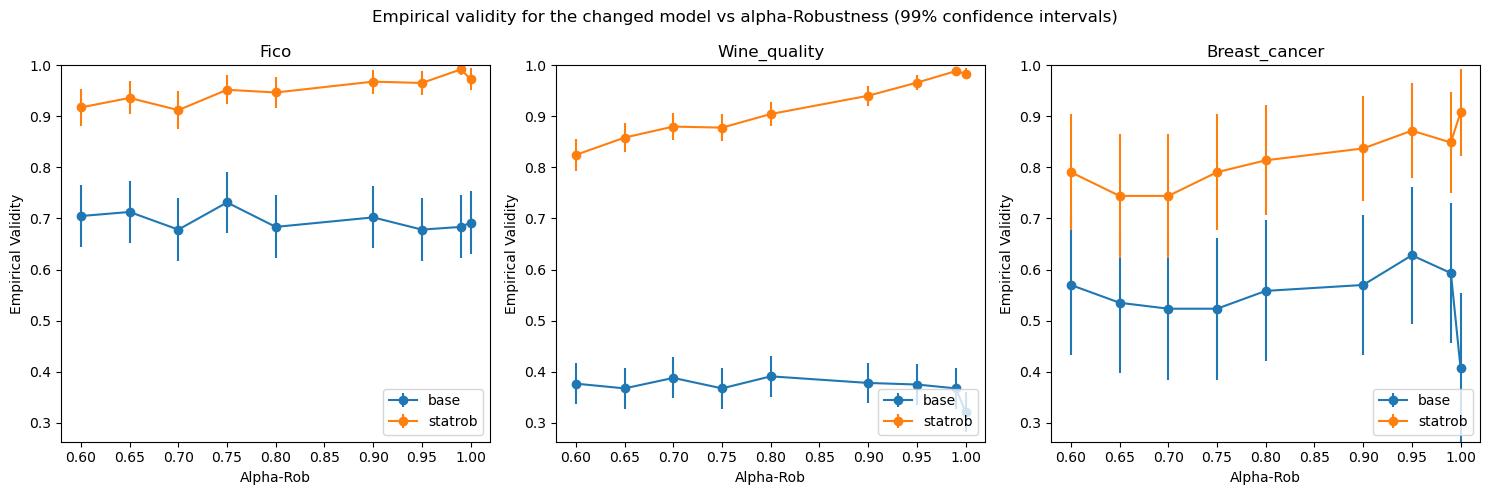

Plotting with base method dice and saving to results_big_benchmark_march6/plots/empirical_vs_alpha_dice_SameSampleExperimentData.png
x_minval: 0.6638273436994839


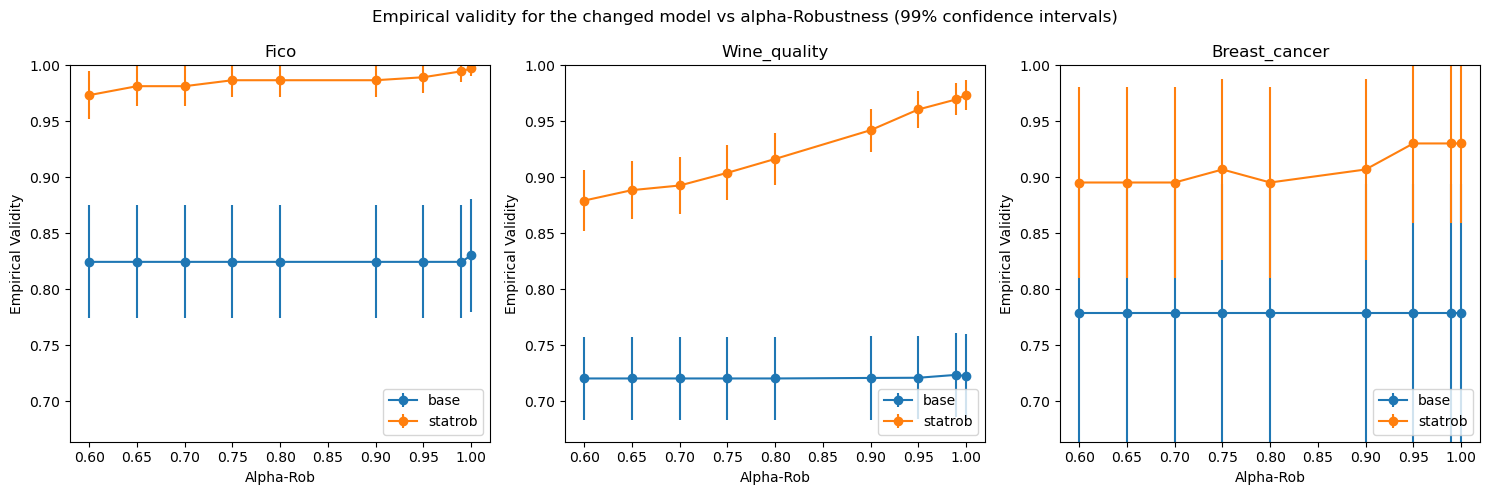

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/empirical_vs_alpha_gs_TwoSamplesOneDatasetExperimentData.png
x_minval: 0.04639703706561443


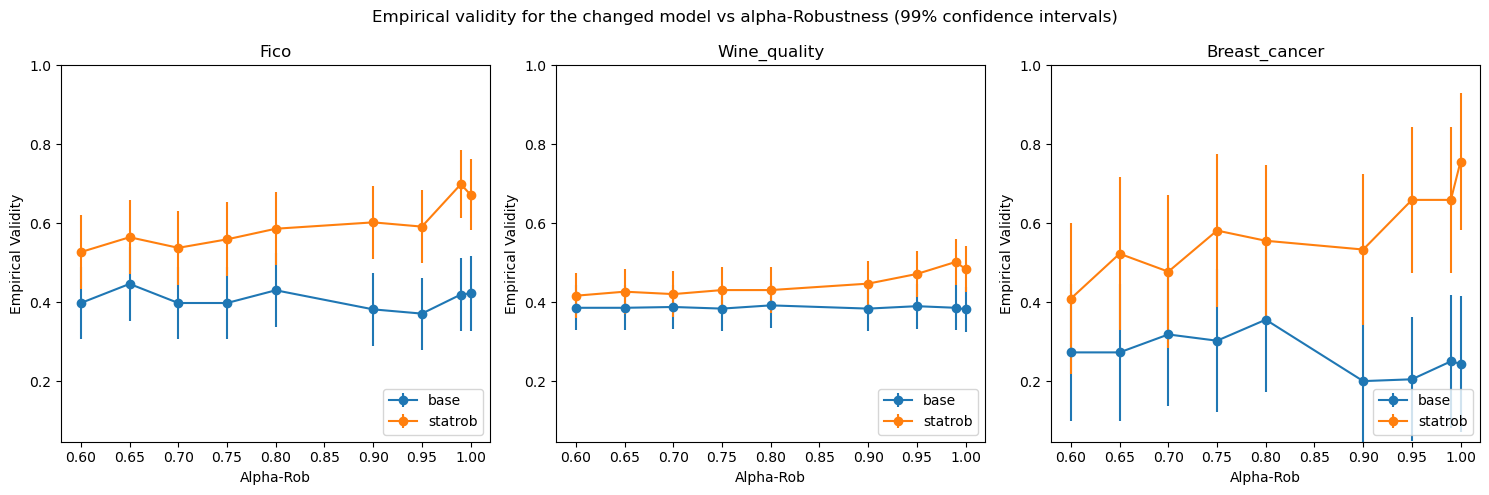

Plotting with base method dice and saving to results_big_benchmark_march6/plots/empirical_vs_alpha_dice_TwoSamplesOneDatasetExperimentData.png
x_minval: 0.21815405160601736


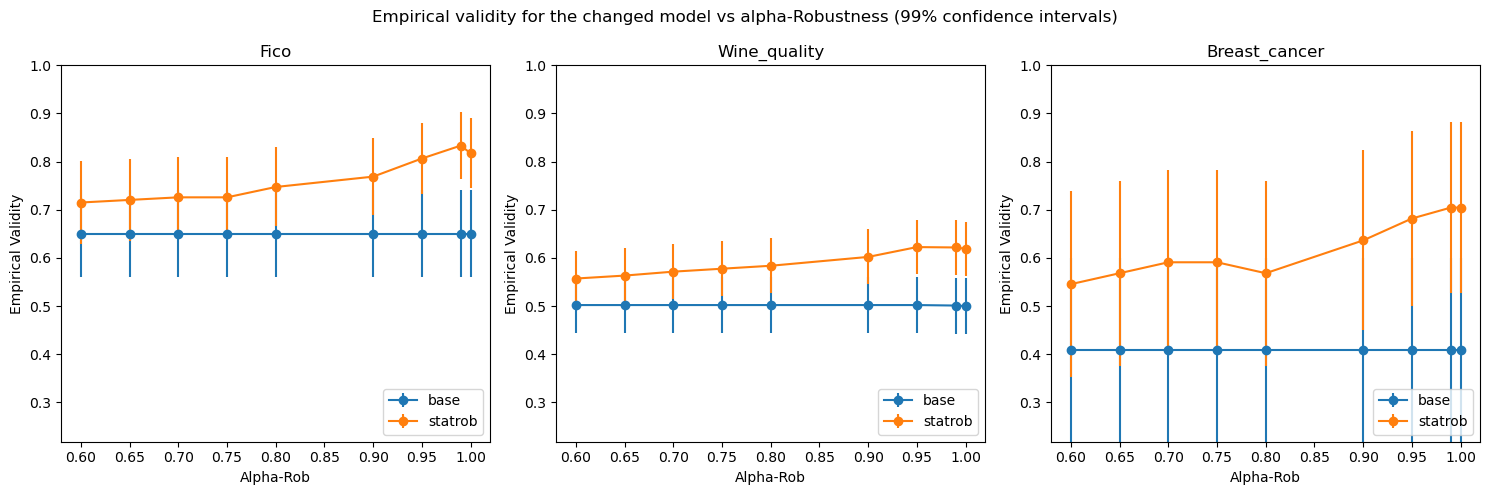

Done!


In [112]:
def read_results(dataset: str, 
                 robust_method: str, 
                 experiment: str, 
                 base_method: str, 
                 ensemble: str, 
                 threshs: list[int] = [60, 65, 70, 75, 80, 90, 95, 99, 9999],
                 folder: str = 'results_big_benchmark_march6/results'
    ) -> dict[int, ExperimentResults]:
    '''
    Read results from the folder and return a dictionary with the threshold as key and the ExperimentResults as value
    '''
    name = f'{ensemble}-{dataset}-{robust_method}-{experiment}-{base_method}-config_a0'
    experiment_results = {}
    for i, a in enumerate(threshs):
        f = f'{folder}/{name}{a}.yml_0.joblib'
        er = ExperimentResults.load_results_from_file(f)
        experiment_results[a] = er
    return experiment_results
    

def plot_empirob_vs_alpha(datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
        base_method: str = 'gs',
        robust_method: str = 'statrob',
        experiment: str = 'SameSampleExperimentData',
        ensemble: str = 'mlp-torch',
        save_filename: str = None
    ) -> None:
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    x_minval = 1
    
    for dataset, ax in zip(datasets, axs):
        results = read_results(dataset, robust_method, experiment, base_method, ensemble)
    
        measurements = []
        cols_validity = None
    
        for exres in results.values():
            res = exres.get_results_as_pandas()
            res = res.dropna()
            cols_validity = [x for x in res.columns if 'validity' in x and '_2' in x]
            measurements.append(res[cols_validity].to_numpy())
        
        means = np.array([np.mean(m, axis=0) for m in measurements])
        stds = np.array([np.std(m, axis=0) for m in measurements])
        Ci_99 = np.array([2.576 * s / np.sqrt(len(m)) for m, s in zip(measurements, stds)])
        alphas = [float(f'0.{t}') for t in threshs]
        
        x_minval = min(x_minval, np.min(means - Ci_99))
        
    
        map_names = {
            'validity_2': 'base',
            'robust_validity_2': 'statrob'
        }
    
        for i, col in enumerate(cols_validity):
            ax.errorbar(alphas, [m[i] for m in means], yerr=[c[i] for c in Ci_99], label=map_names[col], fmt='-o')
        ax.set_xlabel('Alpha-Rob')
        ax.set_ylabel('Empirical Validity')
        ax.set_title(f'{dataset.capitalize()}')
        ax.legend(loc='lower right')
        
    
    print('x_minval:', x_minval)
    # set limits
    for ax in axs:
        ax.set_ylim(x_minval, 1)
        # ax.grid(True)
    
    plt.suptitle('Empirical validity for the changed model vs alpha-Robustness (99% confidence intervals)')
    plt.tight_layout()
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    


SAVE_DIR = 'results_big_benchmark_march6/plots/empirical_vs_alpha'
print('Saving to', SAVE_DIR)
print('Starting to plot...')
for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
    print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
    for base_method in ['gs', 'dice']:
        save_filepath = f'{SAVE_DIR}/empirical_vs_alpha_{base_method}_{experiment_type}.png'
        print(f'Plotting with base method {base_method} and saving to {save_filepath}')
        plot_empirob_vs_alpha(base_method=base_method, experiment=experiment_type, save_filename=save_filepath)

print('Done!')

<div style="background-color: #880000; color: #FFFFFF; font-weight: bold; padding: 10px; margin: 10px 0 20px 0; text-align: center; border-radius: 10px;">Selected alpha vs actual lowest alpha for the returned counterfactual </div>

Saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha
Starting to plot...
======================================== Experiment type: SameSampleExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha/alpha_vs_lowest_alpha_gs_SameSampleExperimentData.png
x_minval: 0.5


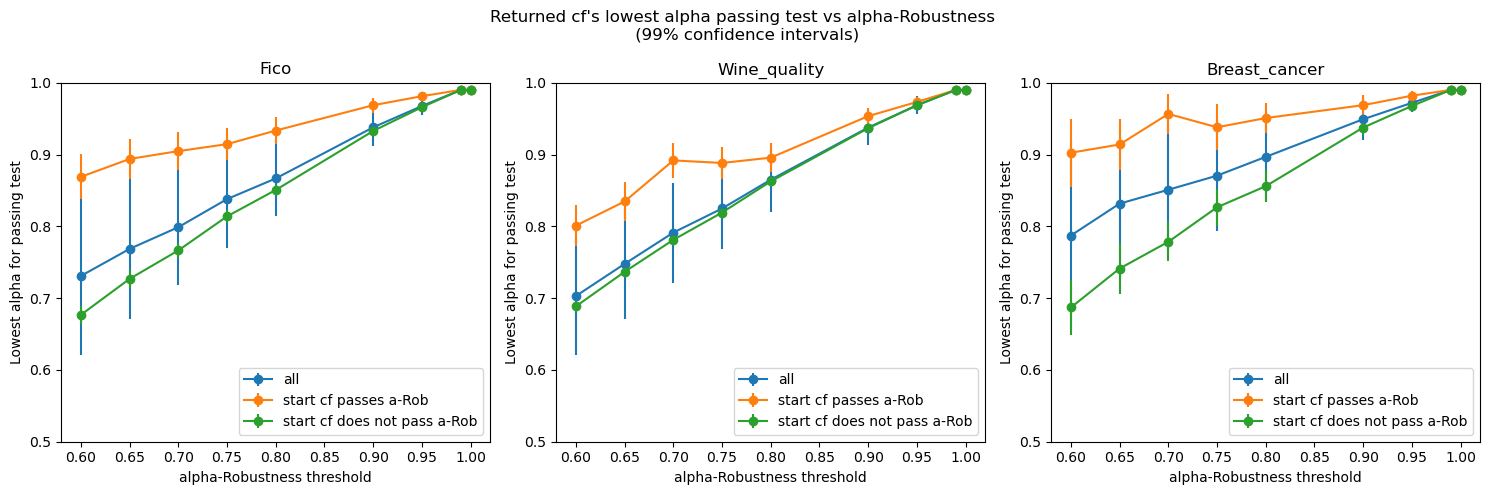

Plotting with base method dice and saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha/alpha_vs_lowest_alpha_dice_SameSampleExperimentData.png
x_minval: 0.5


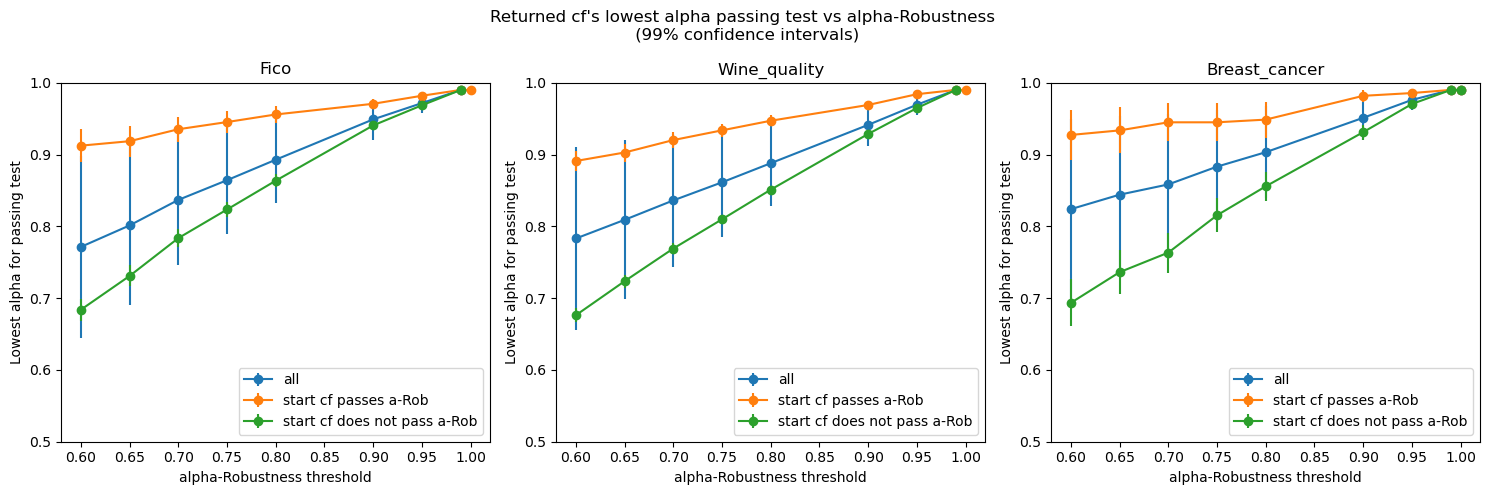

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha/alpha_vs_lowest_alpha_gs_TwoSamplesOneDatasetExperimentData.png
x_minval: 0.5


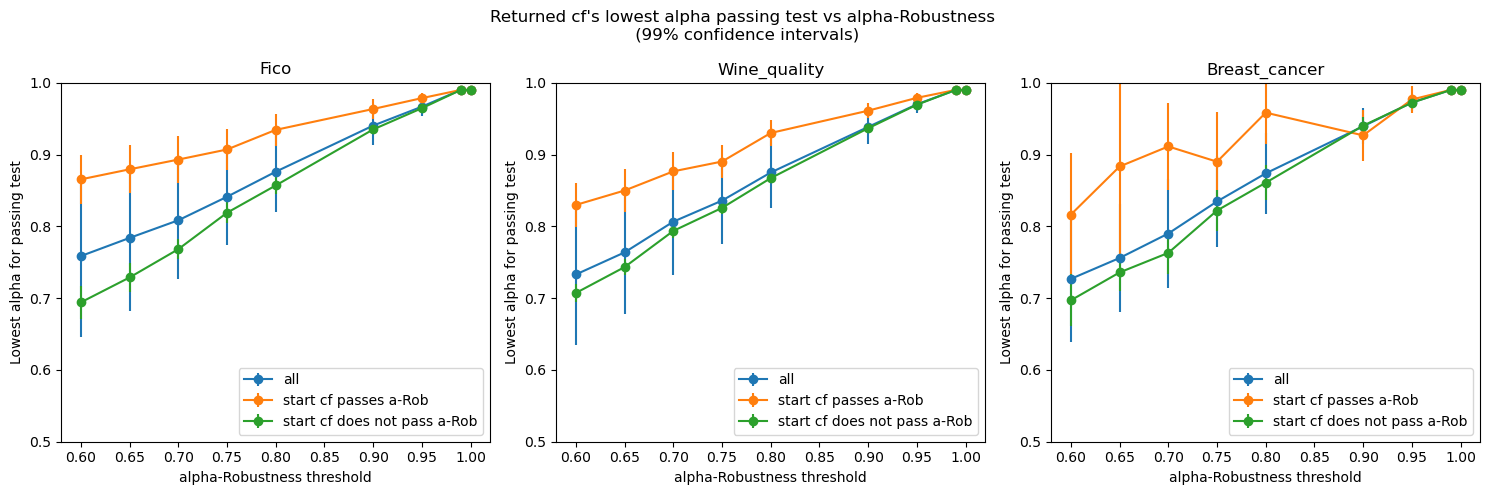

Plotting with base method dice and saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha/alpha_vs_lowest_alpha_dice_TwoSamplesOneDatasetExperimentData.png
x_minval: 0.5


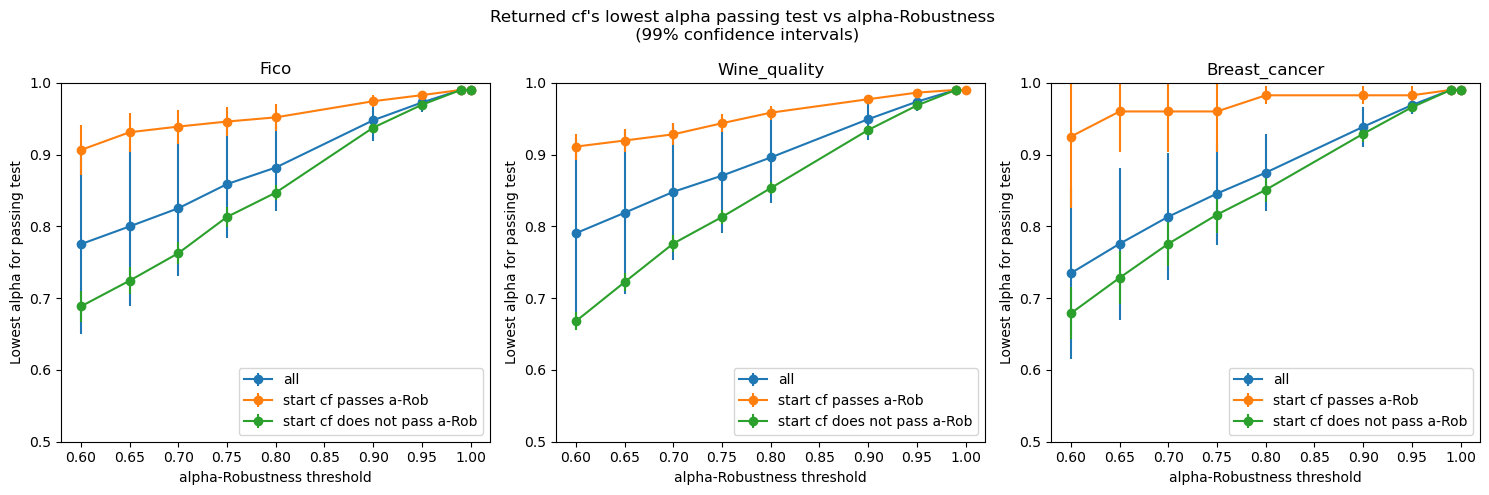

Done!


In [130]:
def alpha_vs_lowest_alpha(datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
        base_method: str = 'gs',
        robust_method: str = 'statrob',
        experiment: str = 'SameSampleExperimentData',
        ensemble: str = 'mlp-torch',
        threshs: list[int] = [60, 65, 70, 75, 80, 90, 95, 99, 9999],
        save_filename: str = None
    ) -> None:
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    x_minval = 0.5
    
    for dataset, ax in zip(datasets, axs):
        results = read_results(dataset, robust_method, experiment, base_method, ensemble)
    
        measurements = []
        maxalphas = []
        start_sample_passing = []
        cols_validity = None
    
        for exres in results.values():
            res = exres.get_results_as_pandas()
            res = res.dropna()
            cols_validity = [x for x in res.columns if 'validity' in x and '_2' in x]
            measurements.append(res[cols_validity].to_numpy())
            
            maxalpha = [x['highest_confidence'] for x in exres.records['artifacts']]
            start_sample_pass_list = [x['start_sample_passes_test'] for x in exres.records['artifacts']]
            
            maxalphas.append(maxalpha)
            start_sample_passing.append(start_sample_pass_list)
        
        # Normal 
        means = np.array([np.mean(m, axis=0) for m in measurements])
        stds = np.array([np.std(m, axis=0) for m in measurements])
        Ci_99 = np.array([2.576 * s / np.sqrt(len(m)) for m, s in zip(measurements, stds)])
        
        # Max alpha
        ma_means = np.array([np.mean(m) for m in maxalphas])
        ma_stds = np.array([np.std(m) for m in maxalphas])
        ma_Ci_99 = np.array([2.576 * s / np.sqrt(len(maxalphas)) for s in ma_stds])
        
        # Start sample passing
        ssp_measurements_filterd = []
        for meas, ssp in zip(maxalphas, start_sample_passing):
            filtered = list(filter(lambda x: x[1] is True, zip(meas, ssp)))
            ssp_measurements_filterd.append([x[0] for x in filtered])
        
        ssp_means = np.array([np.mean(m, axis=0) for m in ssp_measurements_filterd])
        ssp_stds = np.array([np.std(m, axis=0) for m in ssp_measurements_filterd])
        ssp_Ci_99 = np.array([2.576 * s / np.sqrt(len(m)) for m, s in zip(ssp_measurements_filterd, ssp_stds)])

        # Start sample not passing
        ssnp_measurements_filterd = []
        for meas, ssp in zip(maxalphas, start_sample_passing):
            filtered = list(filter(lambda x: x[1] is False, zip(meas, ssp)))
            ssnp_measurements_filterd.append([x[0] for x in filtered])
        
        ssnp_means = np.array([np.mean(m, axis=0) for m in ssnp_measurements_filterd])
        ssnp_stds = np.array([np.std(m, axis=0) for m in ssnp_measurements_filterd])
        ssnp_Ci_99 = np.array([2.576 * s / np.sqrt(len(m)) for m, s in zip(ssnp_measurements_filterd, ssnp_stds)])
            
        # Reference x-axis
        alphas = [float(f'0.{t}') for t in threshs]
        
        # x_minval = min(x_minval, np.min(ma_means - ma_Ci_99))
        # x_minval = min(x_minval, np.min(ssp_means - ssp_Ci_99))
        # x_minval = min(x_minval, np.min(ssnp_means - ssnp_Ci_99))
        # x_minval = max(0, x_minval - 0.1)
        
    
        # map_names = {
        #     'validity_2': 'base',
        #     'robust_validity_2': 'statrob '
        # }
    
        # for i, col in enumerate(cols_validity):
        #     ax.errorbar(alphas, [m[i] for m in means], yerr=[c[i] for c in Ci_99], label=map_names[col], fmt='-o')
            
        ax.errorbar(alphas, ma_means, yerr=ma_Ci_99, label='all', fmt='-o')
        ax.errorbar(alphas, [m for m in ssp_means], yerr=[c for c in ssp_Ci_99], label='start cf passes a-Rob', fmt='-o')
        ax.errorbar(alphas, [m for m in ssnp_means], yerr=[c for c in ssnp_Ci_99], label='start cf does not pass a-Rob', fmt='-o')
            
        ax.set_xlabel('alpha-Robustness threshold')
        ax.set_ylabel('Lowest alpha for passing test')
        ax.set_title(f'{dataset.capitalize()}')
        ax.legend(loc='lower right')
        
    
    print('x_minval:', x_minval)
    # set limits
    for ax in axs:
        ax.set_ylim(x_minval, 1)
        # ax.grid(True)
    
    plt.suptitle('Returned cf\'s lowest alpha passing test vs alpha-Robustness \n (99% confidence intervals)')
    plt.tight_layout()
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    


SAVE_DIR = 'results_big_benchmark_march6/plots/alpha_vs_lowest_alpha'
print('Saving to', SAVE_DIR)
print('Starting to plot...')
for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
    print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
    for base_method in ['gs', 'dice']:
        save_filepath = f'{SAVE_DIR}/alpha_vs_lowest_alpha_{base_method}_{experiment_type}.png'
        print(f'Plotting with base method {base_method} and saving to {save_filepath}')
        alpha_vs_lowest_alpha(base_method=base_method, experiment=experiment_type, save_filename=save_filepath)

print('Done!')

<div style="background-color: #880000; color: #FFFFFF; font-weight: bold; padding: 10px; margin: 10px 0 20px 0; text-align: center; border-radius: 10px;">RobX vs Statrob fidelity to the base counterfactual</div>

Starting to plot...
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= Metric: proximityL1 +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
======================================== Experiment type: SameSampleExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL1/proximityL1_vs_alpha_rob_gs_SameSampleExperimentData.png
[0.36677919 0.37436963 0.38290639 0.39542452 0.40694251 0.45094467
 0.48340296 0.5495089  0.47903487]
x_minval: 0.0059785029057206895


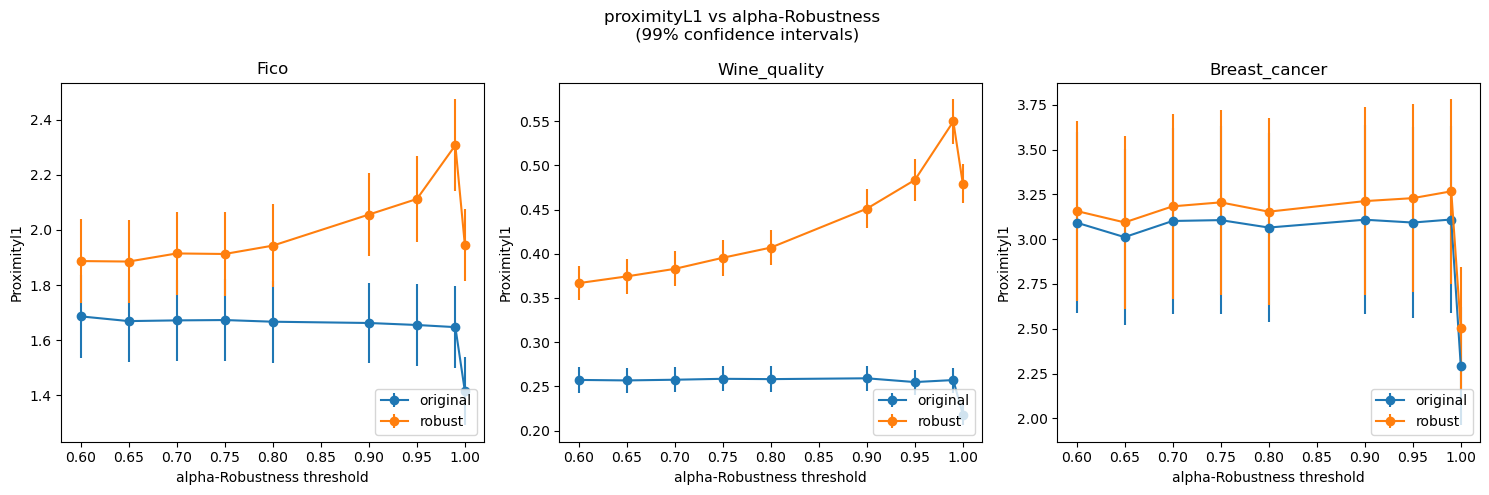

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL1/proximityL1_vs_alpha_rob_dice_SameSampleExperimentData.png
[0.91735743 0.93137848 0.94859351 0.96819988 0.99180058 1.04710268
 1.09976817 1.18974382 1.10377711]
x_minval: 0.20000000000000004


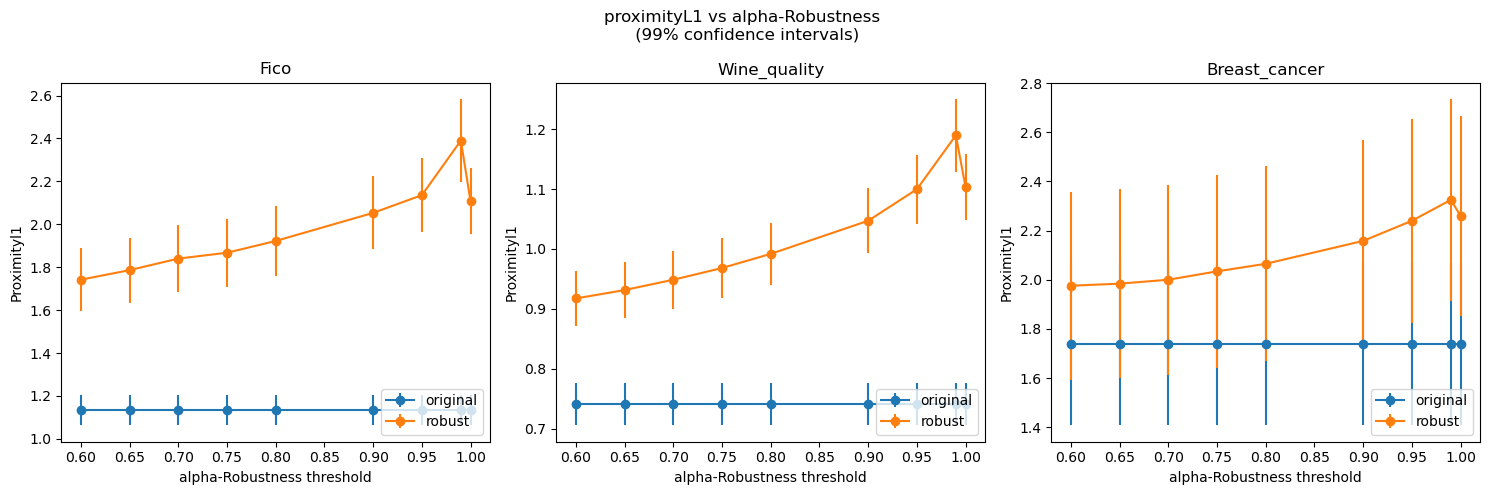

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL1/proximityL1_vs_alpha_rob_gs_TwoSamplesOneDatasetExperimentData.png
[0.3846398  0.39230953 0.3981632  0.40708417 0.40977015 0.43757974
 0.46078898 0.49473493 0.441997  ]
x_minval: 0.04463942984424368


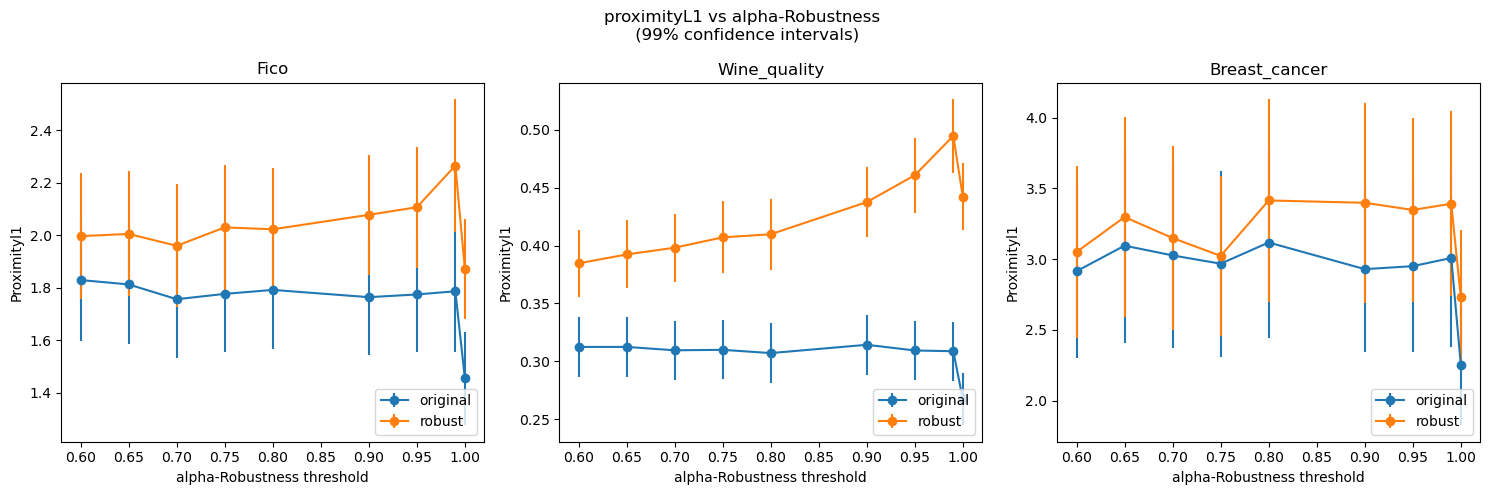

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL1/proximityL1_vs_alpha_rob_dice_TwoSamplesOneDatasetExperimentData.png
[0.9075932  0.9177033  0.93192681 0.94371154 0.96233278 1.00614895
 1.04405336 1.10030149 1.04147306]
x_minval: 0.20000000000000004


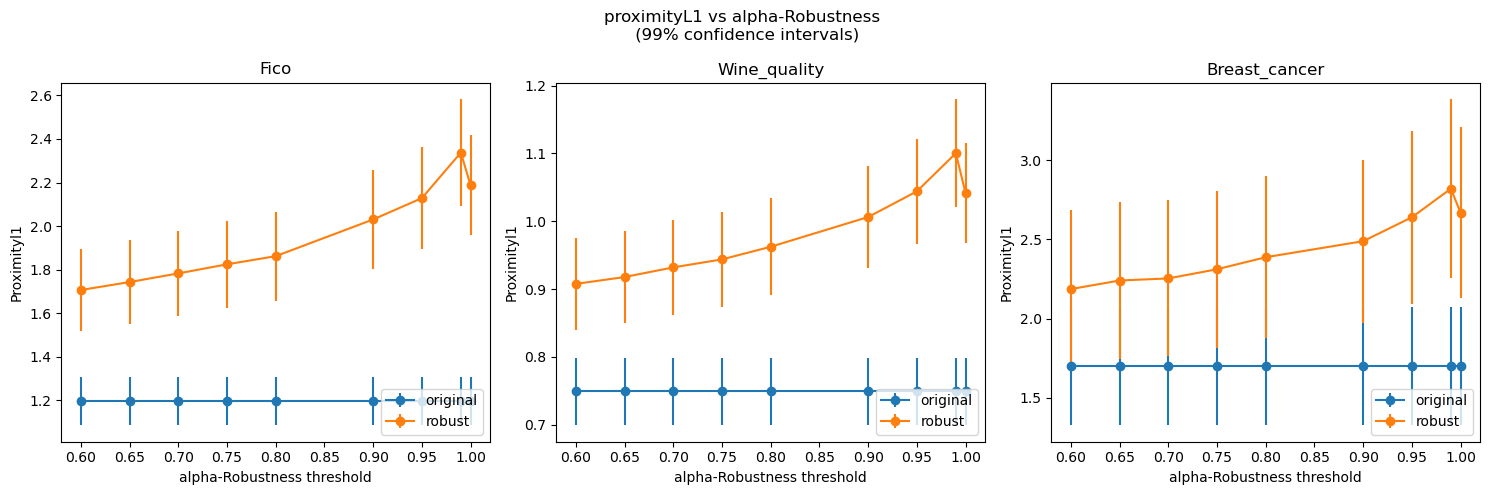

Done!


In [134]:
def plot_metric_vs_alpha_rob(metric: str,
        datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
        base_method: str = 'gs',
        robust_method: str = 'statrob',
        experiment: str = 'SameSampleExperimentData',
        ensemble: str = 'mlp-torch',
        threshs: list[int] = [60, 65, 70, 75, 80, 90, 95, 99, 9999],
        save_filename: str = None
    ) -> None:
    '''
    Available metrics: 'proximityL1', 'proximityL2', 'dpow', 'feasibility'
    '''

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    x_minval = 0.5
    
    for dataset, ax in zip(datasets, axs):
        results = read_results(dataset, robust_method, experiment, base_method, ensemble)
    
        measurements_orig = []
        measurements_rob = []
    
        for exres in results.values():
            
            metric_orig = np.array(exres.get_results_for_metric(metric))
            metric_rob = np.array(exres.get_results_for_metric(f'robust_{metric}'))
            
            # remove nans
            metric_orig = metric_orig[~np.isnan(metric_orig)]
            metric_rob = metric_rob[~np.isnan(metric_rob)]
            
            measurements_orig.append(metric_orig)
            measurements_rob.append(metric_rob)
            
        # Original
        means_orig = np.array([np.mean(m) for m in measurements_orig])
        stds_orig = np.array([np.std(m) for m in measurements_orig])
        Ci_99_orig = np.array([2.576 * s / np.sqrt(len(m)) for m, s in zip(measurements_orig, stds_orig)])
        
        # Robust
        means_rob = np.array([np.mean(m) for m in measurements_rob])
        stds_rob = np.array([np.std(m) for m in measurements_rob])
        Ci_99_rob = np.array([2.576 * s / np.sqrt(len(m)) for m, s in zip(measurements_rob, stds_rob)])
            
        if dataset == 'wine_quality':
            print(means_rob)
        
        # Reference x-axis
        alphas = [float(f'0.{t}') for t in threshs]
        
        x_minval = min(x_minval, np.min(means_orig - Ci_99_orig))
        x_minval = min(x_minval, np.min(means_rob - Ci_99_rob))
        x_minval = max(0, x_minval - 0.1)
        
        ax.errorbar(alphas, means_orig, yerr=Ci_99_orig, label='original', fmt='-o')
        ax.errorbar(alphas, means_rob, yerr=Ci_99_rob, label='robust', fmt='-o')
        
        ax.set_xlabel('alpha-Robustness threshold')
        ax.set_ylabel(f'{metric.capitalize()}')
        ax.set_title(f'{dataset.capitalize()}')
        ax.legend(loc='lower right')
        
    
    print('x_minval:', x_minval)
    # # set limits
    # for ax in axs:
    #     ax.set_ylim(x_minval, 1)
    #     # ax.grid(True)
        
    plt.suptitle(f'{metric} vs alpha-Robustness \n (99% confidence intervals)')
    plt.tight_layout()
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
        
    plt.show()
    


print('Starting to plot...')
for metric in ['proximityL1']:
    SAVE_DIR = f'results_big_benchmark_march6/plots/metric_vs_alpha_rob/{metric}'
    print('+='*40 + f' Metric: {metric} ' + '+='*40)
    for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
        print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
        for base_method in ['gs', 'dice']:
                print('-'*40 + f' Base method: {base_method} ' + '-'*40)
                save_filepath = f'{SAVE_DIR}/{metric}_vs_alpha_rob_{base_method}_{experiment_type}.png'
                print(f'Plotting with base method {base_method} and saving to {save_filepath}')
                plot_metric_vs_alpha_rob(metric, base_method=base_method, experiment=experiment_type, save_filename=save_filepath)            
            
print('Done!')

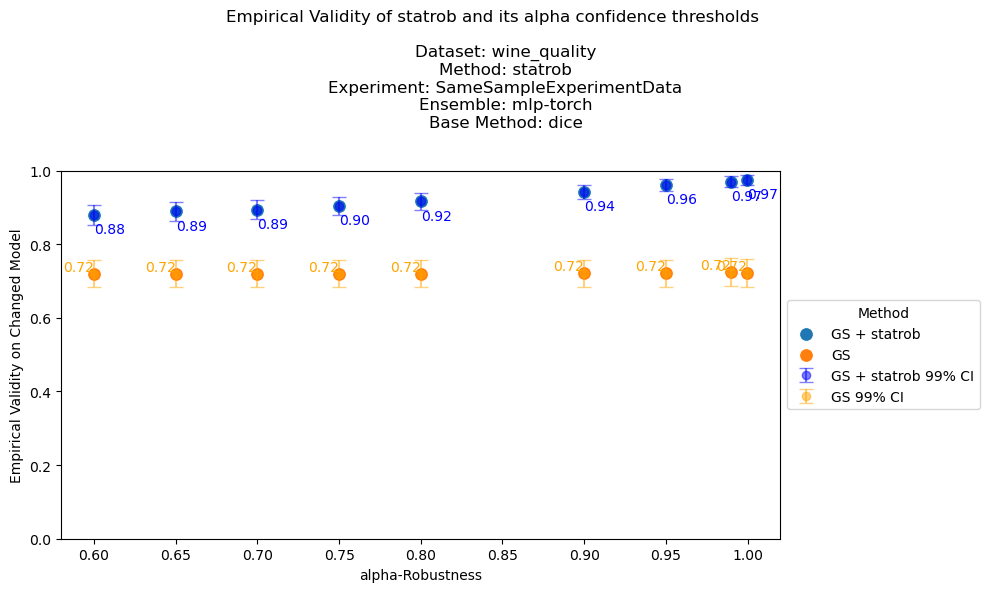

In [62]:
method = ROBUST_METHOD

def plot_robustness(df, df_stdev, method, folder, name):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.scatterplot(data=df, x='alpha-Rob', y=f'validity_{method}_2', s=100, legend=False, label=f'GS + {method}')
    #Add error bars
    plt.errorbar(df['alpha-Rob'], df[f'validity_{method}_2'], yerr=df_stdev[f'validity_{method}_2'], 
                 fmt='o', color='blue', capsize=5, alpha=0.5, label=f'GS + {method} 99% CI')

    sns.scatterplot(data=df, x='alpha-Rob', y=f'validity_orig_2', s=100, legend=False, label='GS')
    plt.errorbar(df['alpha-Rob'], df[f'validity_orig_2'], yerr=df_stdev[f'validity_orig_2'],
                    fmt='o', color='orange', capsize=5, alpha=0.5, label='GS 99% CI')


    # plt.title(f'Dataset: {DATASET} - {method} Robustness vs Empirical Validity on Changed Model')
    title = f'''Empirical Validity of {method} and its alpha confidence thresholds \n 
    Dataset: {DATASET}
    Method: {ROBUST_METHOD}
    Experiment: {EXPERIMENT}
    Ensemble: {ENSEMBLE}
    Base Method: {BASE_METHOD}
    '''
    
    plt.suptitle(title)
    plt.xlabel('alpha-Robustness')
    plt.ylabel('Empirical Validity on Changed Model')
    # Set y-limit to 1
    plt.ylim(0, 1)

    #Plot the numbers next to the points
    for i, row in df.iterrows():
        plt.text(row['alpha-Rob'], row[f'validity_{method}_2'] - 0.02, f'{row[f"validity_{method}_2"]:.2f}', ha='left', va='top', color='blue')
        plt.text(row['alpha-Rob'], row[f'validity_orig_2'], f'{row[f"validity_orig_2"]:.2f}', ha='right', va='bottom', color='orange')


    # Move the legend outside the figure
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Method')
    plt.tight_layout()
    
    save_path = f'{folder}/images'
    os.makedirs(save_path, exist_ok=True)
    plt.savefig(f'{save_path}/{name}_val_rob_corr.png')

    plt.show()

plot_robustness(df, df_stdev, method, folder, name)

In [35]:
table = df.drop('alpha-Rob', axis=1).iloc[3].to_frame().round(3)
# table.index = ['original_1', 'original_2', 'statrob_1', 'statrob_2']
table.columns = ['Validity']
table['StdDev'] = df_stdev.iloc[3].to_numpy().round(3)
table['model'] = ['original', 'changed', 'original', 'changed']
table['Method'] = ['GrowingSpheres', 'GrowingSpheres', 'GrowingSpheres + Statrobxplus(0.9-Rob)', 'GrowingSpheres + Statrobxplus(0.9-Rob)']



# Plotting the bar plot
sns.catplot(
    data=table, kind="bar",
    y="Validity", x="Method", hue="model",
    palette="dark", alpha=.6, height=6, legend=True, legend_out=False, aspect=2
)

# Adding error bars based on StdDev
for i, (validity, std_dev) in enumerate(zip(table['Validity'], table['StdDev'])):
    if i % 2 == 1:
        plt.errorbar(i / 2 - 0.3 , validity, yerr=std_dev, fmt='none', ecolor='black', capsize=5, alpha=0.3)

# Adding numbers on top of bars
ax = plt.gca()
for cont in ax.containers[:2]:
    for bar in cont:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjusting legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

plt.title('Validity of counterfactuals on the original and changed model. \nExperiment: Same data, same model with different seed')
plt.tight_layout()
plt.savefig(f'{folder}/{name}_barplot.png')
plt.show()


print(table)

ValueError: Length of values (5) does not match length of index (4)

In [ ]:
name = 'torch-fico-robx-var01-config0'

robs = []
robs_std = []
notna_count = []

threshs = np.array([6,7,8,9])
for i, a in enumerate(threshs):
    f = f'{folder}/{name}{a}_0.joblib'
    print(f)
    er = ExperimentResults.load_results_from_file(f)
    res = er.get_results_as_pandas()
    # res = res.dropna() #TODO investigate what causes nulls 
    # res = res[res['robust_validity'] > 0] #TODO fix so robust cf is always valid for model 1
    cols = [x for x in res.columns if 'validity' in x]
    means = res[cols].mean().to_numpy()
    stds = res[cols].std().to_numpy()
    robs.append(means)
    robs_std.append(stds)
    
    notna_count.append(res[cols].notna().sum().to_numpy())

df_stdev = pd.DataFrame(robs_std, columns=cols)
print('stddevs:', df_stdev.round(3))
df = pd.DataFrame(robs, columns=cols).round(3)
df.columns = ['validity_orig_1', 'validity_orig_2', 'validity_statrob_1', 'validity_statrob_2']
df['alpha-Rob'] = threshs / 10
df

In [ ]:
table = df.drop('alpha-Rob', axis=1).iloc[3].to_frame().round(3)
# table.index = ['original_1', 'original_2', 'statrob_1', 'statrob_2']
table.columns = ['Validity']
table['StdDev'] = df_stdev.iloc[3].to_numpy().round(3)
table['model'] = ['original', 'changed', 'original', 'changed']
table['Method'] = ['GrowingSpheres', 'GrowingSpheres', 'GrowingSpheres + RobX(tau=0.6,std=0.1)', 'GrowingSpheres + RobX(tau=0.6,std=0.1)']



# Plotting the bar plot
sns.catplot(
    data=table, kind="bar",
    y="Validity", x="Method", hue="model",
    palette="dark", alpha=.6, height=6, legend=True, legend_out=False, aspect=2
)

# Adding error bars based on StdDev
for i, (validity, std_dev) in enumerate(zip(table['Validity'], table['StdDev'])):
    if i % 2 == 1:
        plt.errorbar(i / 2 - 0.3 , validity, yerr=std_dev, fmt='none', ecolor='black', capsize=5, alpha=0.3)

# Adding numbers on top of bars
ax = plt.gca()
for cont in ax.containers[:2]:
    for bar in cont:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjusting legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

plt.title('Validity of counterfactuals on the original and changed model. \nExperiment: Same data, same model with different seed')
plt.tight_layout()
plt.savefig(f'{folder}/{name}_barplot.png')
plt.show()


print(table)

In [ ]:
notna_df = pd.DataFrame(notna_count, columns=cols)
notna_df.index = ['tau=0.6', 'tau=0.7', 'tau=0.8', 'tau=0.9']
notna_df.columns = ['validity_base_original', 'validity_base_changed', 'validity_robx_original', 'validity_robx_changed']
print('How many instances were correctly returned by the explainer? For how many instances was RobX able to find a valid CF?')
notna_df